In [1]:
import sys
import os
import pandas as pd
import logging

current_dir = os.getcwd()
project_root = current_dir

if project_root not in sys.path:
    sys.path.append(project_root)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

Считаем матрицу расстояний Гауера (может занять время)...
Начинаем кластеризацию...
k=2, Silhouette=0.198
k=3, Silhouette=0.104
k=4, Silhouette=0.058
k=5, Silhouette=0.095
k=6, Silhouette=0.198
k=7, Silhouette=0.191
k=8, Silhouette=0.262
k=9, Silhouette=0.255
k=10, Silhouette=0.257
k=11, Silhouette=0.218
k=12, Silhouette=0.316
k=13, Silhouette=0.245
k=14, Silhouette=0.252
k=15, Silhouette=0.165
k=16, Silhouette=0.424
k=17, Silhouette=0.160
k=18, Silhouette=0.223
k=19, Silhouette=0.262


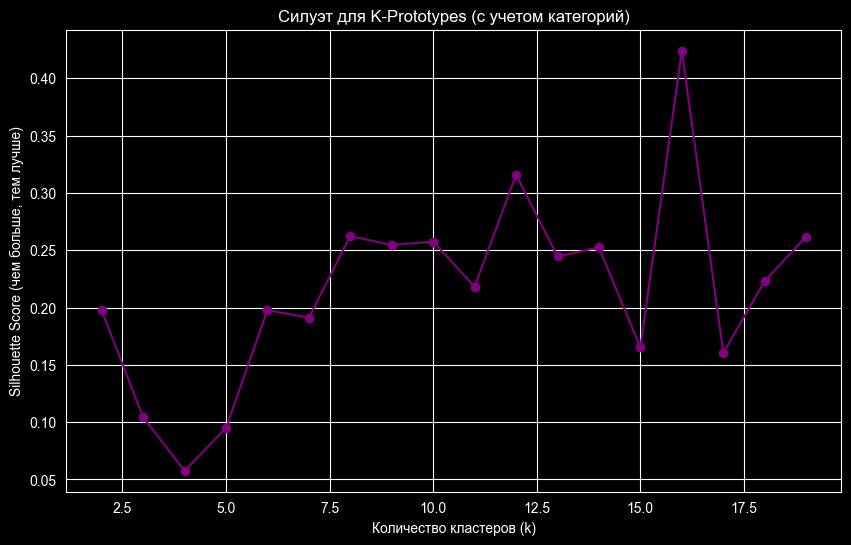

Лучшее k по силуэту: 16

Размеры кластеров:
cluster
0      30
1     124
2      20
3      82
4      33
5       5
6      17
7      33
8      49
9      13
10     41
11     28
12     46
13     29
14     68
15     42
Name: count, dtype: int64
Средние показатели по кластерам:
         salary_avg
cluster            
0          2.328130
1         -0.472580
2         -0.294380
3         -0.502553
4         -0.664798
5          4.417117
6          1.475764
7         -0.643946
8          0.645170
9         -1.854861
10        -0.963543
11         0.075363
12         1.192186
13        -1.228562
14         0.524584
15         0.163786


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gower
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from src.utils.data_loader import load_vacancies_data

df = load_vacancies_data()

cols = ['salary_avg', 'name']
num_cols = ['salary_avg']
cat_cols_indices = [1]

X = df[cols].copy()

X = X.dropna()

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Считаем матрицу расстояний Гауера (может занять время)...")
gower_dist = gower.gower_matrix(X)

metrics = []
K_range = range(2, 20)

print("Начинаем кластеризацию...")
for k in K_range:
    model = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=0, random_state=42)
    labels = model.fit_predict(X.values, categorical=cat_cols_indices)

    sil_score = silhouette_score(gower_dist, labels, metric='precomputed')

    print(f"k={k}, Silhouette={sil_score:.3f}")
    metrics.append(sil_score)

plt.figure(figsize=(10, 6))
plt.plot(K_range, metrics, marker='o', color='purple')
plt.title('Силуэт для K-Prototypes (с учетом категорий)')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette Score (чем больше, тем лучше)')
plt.grid(True)
plt.show()

best_k = K_range[14]
print(f"Лучшее k по силуэту: {best_k}")

final_model = KPrototypes(n_clusters=best_k, init='Cao', n_init=5, verbose=0, random_state=42)
clusters = final_model.fit_predict(X.values, categorical=cat_cols_indices)

X['cluster'] = clusters

print("\nРазмеры кластеров:")
print(X['cluster'].value_counts().sort_index())


print("Средние показатели по кластерам:")
print(X.groupby('cluster')[num_cols].mean())

